In [1]:
import dask.dataframe as dd
df = dd.read_csv("Netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [2]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

In [3]:
df.describe().compute()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [4]:
df.isnull().sum().compute()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [5]:
filtered_df = df[df['release_year'] == 2021]
filtered_df.compute()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
250,s1223,TV Show,Carmen Sandiego,NaN,"Gina Rodriguez, Finn Wolfhard, Abby Trott, Mic...",United States,15-Jan-21,2021,TV-Y7,4,"Kids' TV, TV Thrillers","A master thief who uses her skills for good, C..."
319,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands",08-Jan-21,2021,TV-Y7,85,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."
397,s1356,Movie,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock,Chris Rock,NaN,12-Jan-21,2021,TV-MA,98,Stand-Up Comedy,"In this extended cut of his 2018 special, Chri..."
492,s1441,TV Show,Cobra Kai,NaN,"Ralph Macchio, William Zabka, Xolo Maridueña, ...",United States,01-Jan-21,2021,TV-14,3,"TV Action & Adventure, TV Dramas",Decades after the tournament that changed thei...
574,s1515,Movie,"Crack: Cocaine, Corruption & Conspiracy",Stanley Nelson,NaN,United States,11-Jan-21,2021,TV-MA,90,Documentaries,"A cheap, powerful drug emerges during a recess..."
589,s1529,Movie,Creating The Queen's Gambit,NaN,NaN,NaN,08-Jan-21,2021,TV-14,14,Documentaries,A fascinating character. Exquisite sets. A wig...
869,s1781,TV Show,Disenchantment,NaN,"Abbi Jacobson, Eric André, Nat Faxon, John DiM...",United States,15-Jan-21,2021,TV-14,3,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","Princess duties call, but she'd rather be drin..."
962,s1865,TV Show,Dream Home Makeover,NaN,NaN,United States,01-Jan-21,2021,TV-G,2,Reality TV,Dreams come true for real families looking for...
1477,s2328,TV Show,Gabby's Dollhouse,NaN,"Laila Lockhart Kraner, Tucker Chandler, Juliet...",NaN,05-Jan-21,2021,TV-Y,1,Kids' TV,"Cute cats, quirky crafts and colorful magic! J..."
1860,s2673,TV Show,Headspace Guide to Meditation,NaN,Andy Puddicombe,United States,01-Jan-21,2021,TV-G,1,"Docuseries, Science & Nature TV","Headspace takes a friendly, animated look at t..."


In [6]:
shows_per_genre = df.groupby('genres').size()
shows_per_genre.compute()

genres
Action & Adventure                                              99
Action & Adventure, Anime Features, Children & Family Movies     3
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        28
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        12
Thrillers                                                       49
Length: 492, dtype: int64

In [7]:
avg_runtime = df.groupby('type')['duration'].mean()
avg_runtime.compute()

type
Movie      99.307978
TV Show     1.775934
Name: duration, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
content_by_year = df.groupby('release_year').size().compute()

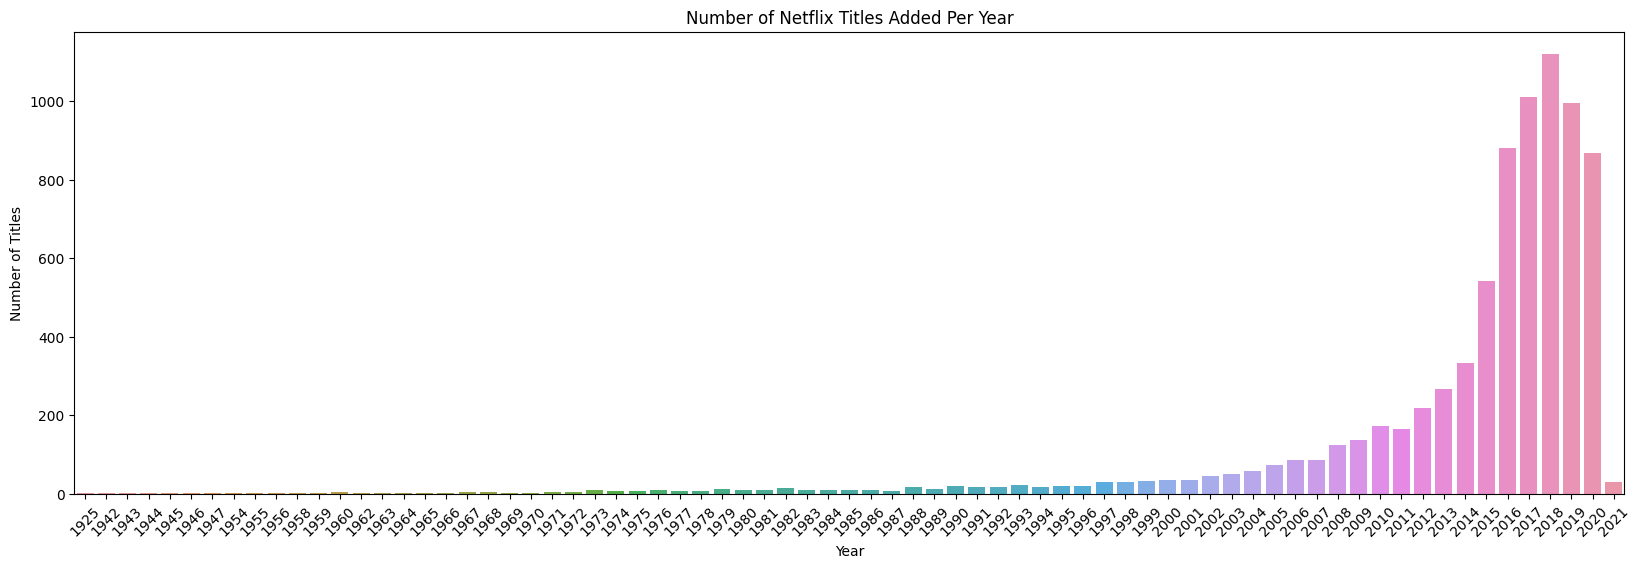

In [15]:
plt.figure(figsize=(20, 6))
sns.barplot(x=content_by_year.index, y=content_by_year.values)
plt.title('Number of Netflix Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [11]:
filtered_df.to_csv('processed_netflix_data.csv', index=False)

['C:\\Users\\venuk\\OneDrive\\Documents\\OneDrive\\MyFolders\\Task\\processed_netflix_data.csv\\0.part']